Value of c = 2.109375
Sample Mean of the random numbers obtained = 0.3347784227865919
Theoretical Mean of the function f(x) = Expectation of PDF f = 0.3333333333333333
Approximate(Experimental) value of P(0.25 ≤ X ≤ 0.75) based on the generated sample = 0.6229
Actual Probability of P(0.25 ≤ X ≤ 0.75) = 0.61718
Average Number of Iterations = 2.13


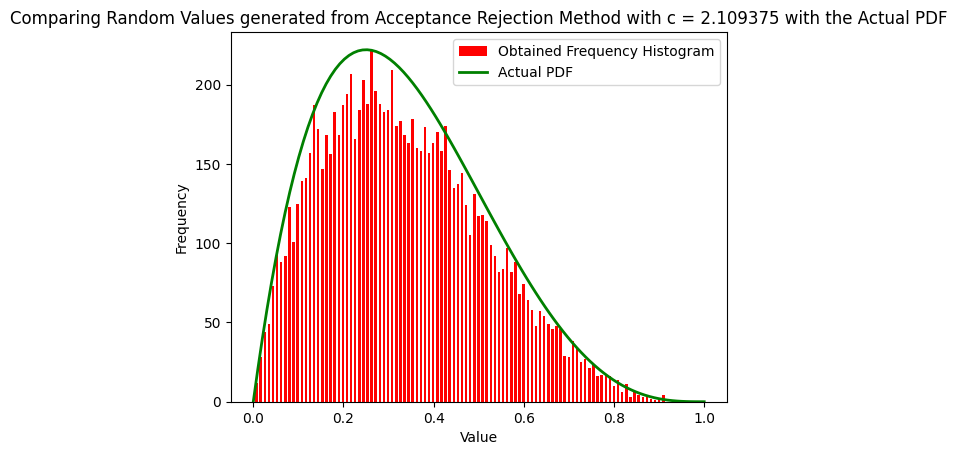


Value of c = 3
Sample Mean of the random numbers obtained = 0.33443098774098284
Theoretical Mean of the function f(x) = Expectation of PDF f = 0.3333333333333333
Approximate(Experimental) value of P(0.25 ≤ X ≤ 0.75) based on the generated sample = 0.6241
Actual Probability of P(0.25 ≤ X ≤ 0.75) = 0.61718
Average Number of Iterations = 3.0214


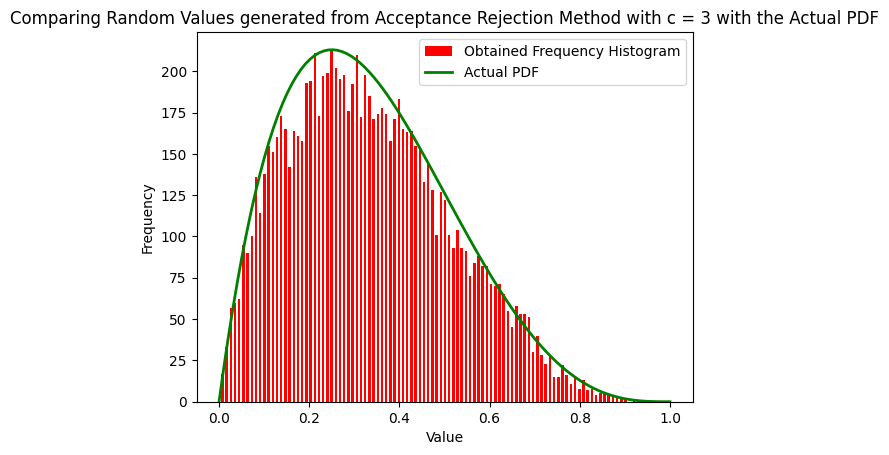


Value of c = 4
Sample Mean of the random numbers obtained = 0.33578501032701447
Theoretical Mean of the function f(x) = Expectation of PDF f = 0.3333333333333333
Approximate(Experimental) value of P(0.25 ≤ X ≤ 0.75) based on the generated sample = 0.6249
Actual Probability of P(0.25 ≤ X ≤ 0.75) = 0.61718
Average Number of Iterations = 4.0138


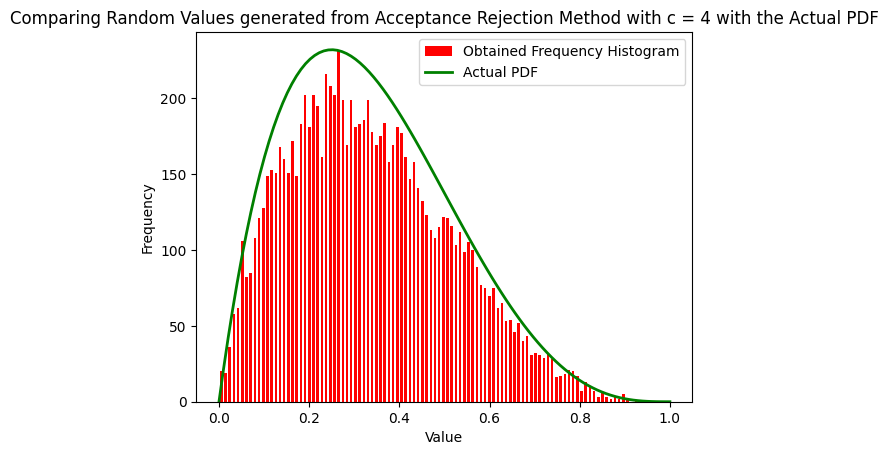

In [17]:
import matplotlib.pyplot as GraphPlotter
import statistics as stat
import numpy as np
def fanv(x):
  return 20*x*pow((1-x),3)
def MyGrapher(RandomValuesGenerated,NumberOfIterations,c):
  a,b,temporar=GraphPlotter.hist(RandomValuesGenerated, 100, color='red', rwidth=0.6, label="Obtained Frequency Histogram")
  y=[] 
  m=max(a)
  for i in b:
    f=20*i*pow((1-i),3)
    y.append((f/2.109375)*m)
     # m/2.109375 is the scaling factor, as smallest c = 2.109375 is the maximum value of f and m is the maximum frequency
     # so to observe the graph and values nicely, the values of f are scaled up by this factor.
  mean_val=stat.mean(RandomValuesGenerated)
  print(f'Value of c = {c}')
  print(f'Sample Mean of the random numbers obtained = {mean_val}')
  print(f'Theoretical Mean of the function f(x) = Expectation of PDF f = {1/3}')
  adder=0
  for i in RandomValuesGenerated:
    if i>=0.25 and i<=0.75:
      adder+=1
  print(f'Approximate(Experimental) value of P(0.25 ≤ X ≤ 0.75) based on the generated sample = {adder/len(RandomValuesGenerated)}')
  print(f'Actual Probability of P(0.25 ≤ X ≤ 0.75) = {0.61718}')
  mean_itr=stat.mean(NumberOfIterations)
  print(f'Average Number of Iterations = {mean_itr}')
  abc = np.linspace(0,1,100)
  # deg = np.array[f(abc)]
  xyz=[]
  for i in abc:
    xyz.append((fanv(i)/2.109375)*m)
  GraphPlotter.plot(abc,xyz, 'green', linewidth=2, label="Actual PDF")
  GraphPlotter.xlabel('Value')
  GraphPlotter.ylabel('Frequency')
  GraphPlotter.title(f'Comparing Random Values generated from Acceptance Rejection Method with c = {c} with the Actual PDF')
  GraphPlotter.legend()
  GraphPlotter.show()
  print()

def RandomNumberGenerator(a1,b1,m1,s1,c,n):
  t1=s1
  RandomValuesGenerated=[]
  NumberOfIterations=[]
  qj=0
  adder=0
  while qj<n:
    u1=t1/m1
    u2=np.random.uniform(0,1)
    t1=(a1*t1+b1)%m1
    x=u1
    f=20*x*pow((1-x),3)
    if c*u2<=f:
      RandomValuesGenerated.append(x)
      NumberOfIterations.append(adder)
      adder=0
      qj+=1
    adder+=1
  MyGrapher(RandomValuesGenerated,NumberOfIterations,c)

RandomNumberGenerator(1327,7,5434775,1,2.109375,10000)
RandomNumberGenerator(1327,7,5434775,1,3,10000)
RandomNumberGenerator(1327,7,5434775,1,4,10000)

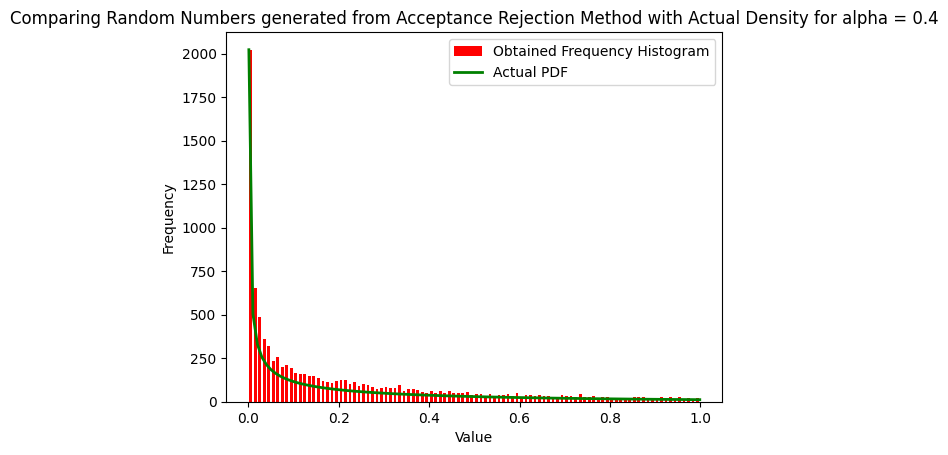

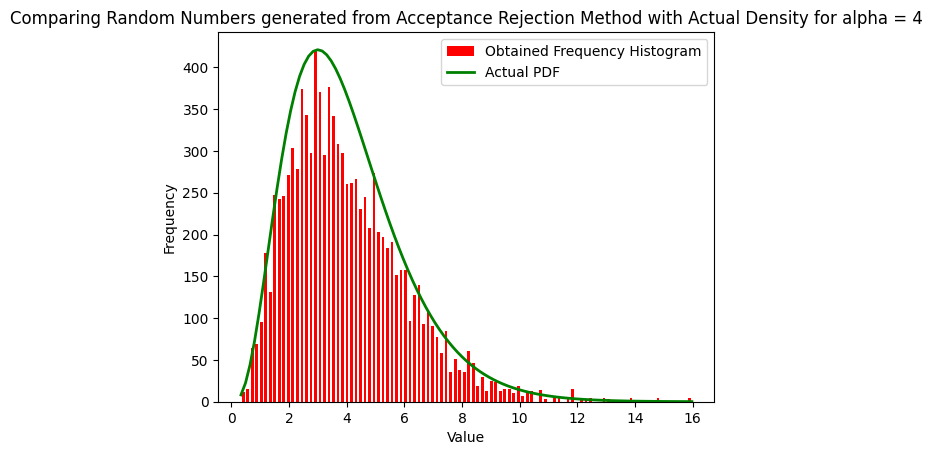

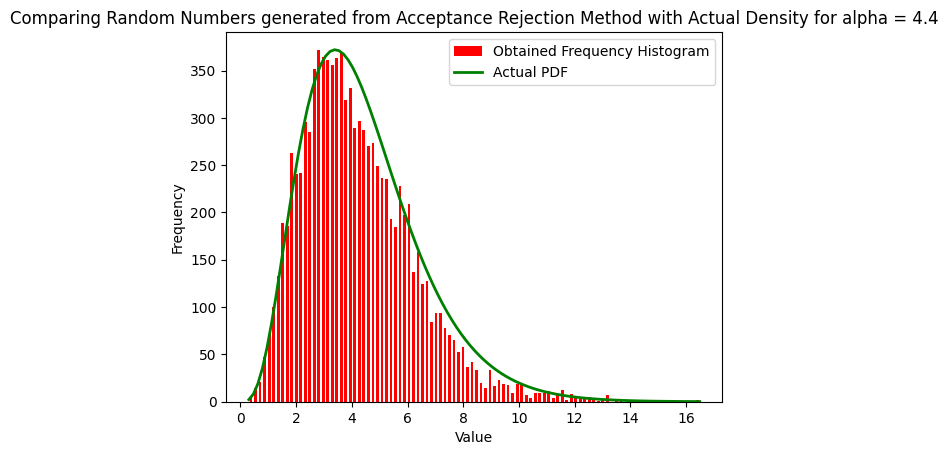

In [52]:
import math
import matplotlib.pyplot as GraphPlotter

def MyGrapher(values,alpha):
  a,b,nht=GraphPlotter.hist(values, 100, color='red', rwidth=0.6, label="Obtained Frequency Histogram")
  y=[] 
  maximumValueOf_a=max(a) 
  if alpha<1:
    b[0]=b[0]+0.001
  for i in b:
    f=math.pow(i,alpha-1)*math.exp(-i)
    y.append(f)
  maximumValueOf_y=max(y)
  # maximumValueOf_a/maximumValueOf_y is the scaling factor, as maximumValueOf_y is the maximum value of f and maximumValueOf_a is the maximum frequency
  # so to observe the graphs and values clearly, the values of f are scaled up by this factor.
  z = [i*(maximumValueOf_a/maximumValueOf_y) for i in y]
  GraphPlotter.plot(b, z, 'green', linewidth=2, label="Actual PDF")
  GraphPlotter.ylabel('Frequency')
  GraphPlotter.legend()
  GraphPlotter.title(f'Comparing Random Numbers generated from Acceptance Rejection Method with Actual Density for alpha = {alpha}')
  GraphPlotter.xlabel('Value')
  GraphPlotter.show()

def RandomNumberGenerator(a1,b1,m1,s1,a2,b2,m2,s2,alpha,n):
  FractionalPartOfAlpha=alpha%1
  IntegralPartOfAlpha=alpha-FractionalPartOfAlpha 
  values=[]
  cou=0
  t1=s1
  t2=s2
  while cou<n:
    temporar=IntegralPartOfAlpha
    y=0
    while temporar>0:
      u1=t1/m1
      t1=(a1*t1+b1)%m1
      y_part=-math.log(u1)
      y=y+y_part
      temporar=temporar-1
    x=0
    while 1 and FractionalPartOfAlpha>0:
      u1=t1/m1
      u2=t2/m2
      t1=(a1*t1+b1)%m1
      t2=(a2*t2+b2)%m2
      A=(1/FractionalPartOfAlpha) + 1/(math.e)
      if u1<1/(FractionalPartOfAlpha*A):
        x=math.pow(FractionalPartOfAlpha*A*u1,1/FractionalPartOfAlpha)
      else:
        continue
      f=math.pow(x,FractionalPartOfAlpha-1)*math.exp(-x)
      c=A
      g=math.pow(x,FractionalPartOfAlpha-1)/A
      if c*g*u2<=f:
        break
    values.append(x+y)
    cou=cou+1

  MyGrapher(values,alpha)
RandomNumberGenerator(1327,5,54785,1,635,4,74407,2,0.4,10000)
RandomNumberGenerator(1327,5,54785,1,635,4,74407,2,4,10000)
RandomNumberGenerator(1327,5,54785,1,635,4,74407,2,4.4,10000)